# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | yaren
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | lazaro cardenas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | nova vicosa
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | rikaze
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | san felice circeo
Processing Record 15 of Set 1 | badger
Processing Record 16 of Set 1 | arkhangel'sk
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | axim
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 of Set 1 | eyl
Proce

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,-49.3500,2.27,97,100,13.73,TF,1715621328
1,albany,42.6001,42.6001,21.08,54,39,1.79,US,1715621055
2,port elizabeth,-33.9180,-33.9180,20.05,92,20,5.66,ZA,1715621330
3,yaren,-0.5472,-0.5472,28.84,71,93,3.94,NR,1715621330
4,avarua,-21.2078,-21.2078,24.03,88,75,2.57,CK,1715621331


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,-49.3500,2.27,97,100,13.73,TF,1715621328
1,albany,42.6001,42.6001,21.08,54,39,1.79,US,1715621055
2,port elizabeth,-33.9180,-33.9180,20.05,92,20,5.66,ZA,1715621330
3,yaren,-0.5472,-0.5472,28.84,71,93,3.94,NR,1715621330
4,avarua,-21.2078,-21.2078,24.03,88,75,2.57,CK,1715621331


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

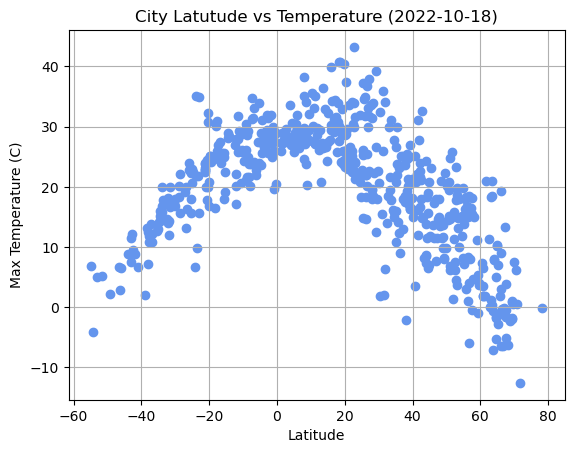

In [71]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],c="cornflowerblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latutude vs Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

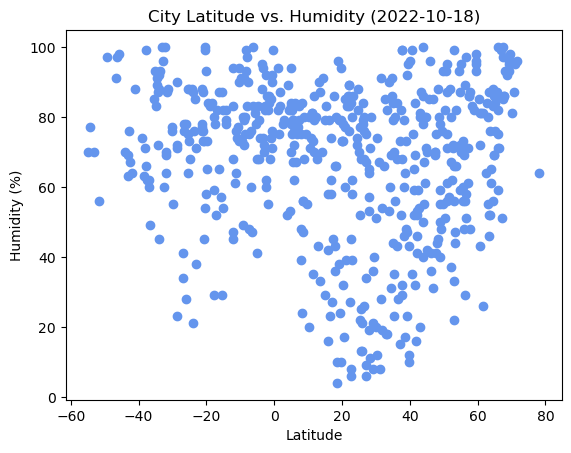

In [72]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],c="cornflowerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

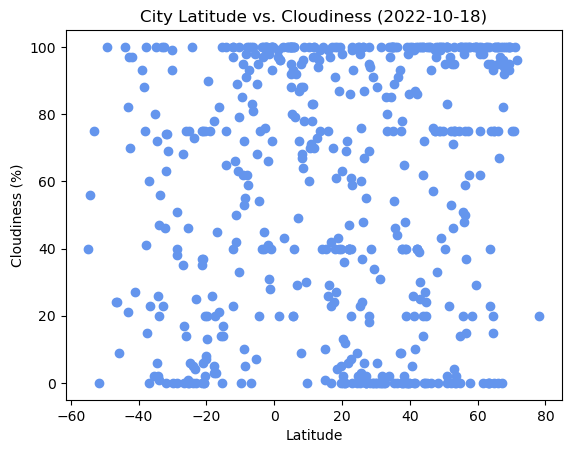

In [73]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],c="cornflowerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

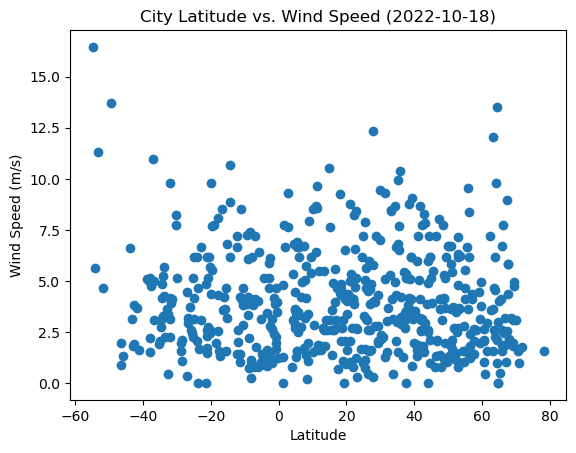

In [74]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linear(x,y,coor,title):
    # Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plot
    plt.scatter(x,y)
    # Regression line 
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coor,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()



In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,42.6001,21.08,54,39,1.79,US,1715621055
5,lazaro cardenas,17.9583,17.9583,30.10,43,100,4.70,MX,1715621332
11,rikaze,29.2500,29.2500,12.45,36,91,4.33,CN,1715621334
13,san felice circeo,41.2372,41.2372,22.09,65,99,1.87,IT,1715621335
14,badger,64.8000,64.8000,10.21,69,75,0.00,US,1715621335


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,-49.3500,2.27,97,100,13.73,TF,1715621328
2,port elizabeth,-33.9180,-33.9180,20.05,92,20,5.66,ZA,1715621330
3,yaren,-0.5472,-0.5472,28.84,71,93,3.94,NR,1715621330
4,avarua,-21.2078,-21.2078,24.03,88,75,2.57,CK,1715621331
6,ushuaia,-54.8000,-54.8000,6.79,70,40,16.46,AR,1715621057


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8005645251390203


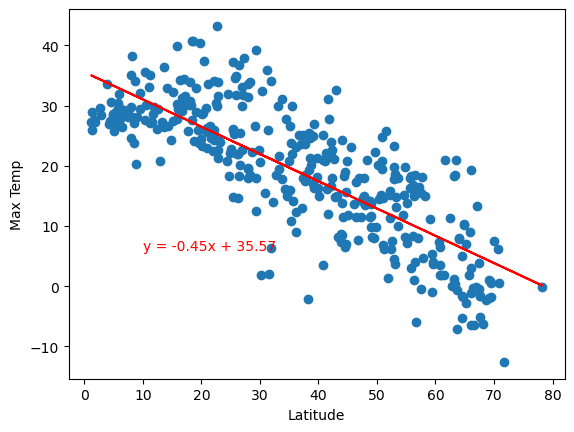

In [78]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
linear(x,y,(10,6),"Max Temp")

The r-squared is: 0.832295778968084


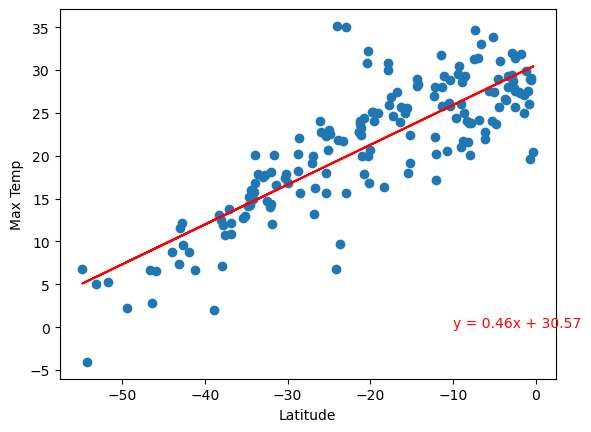

In [79]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
linear(x,y,(-10,0),"Max Temp")

**Discussion about the linear relationship:** There is a strong negative relationship between Latitude and Maximum temperature in the Northern Hemisphere, suggesting that as you go more North away from the equator you can be pretty confident that the max temperatures will decrease. The Southern Hemisphere has a strong positive relationship between Latitude and Max Temperature. The graph shows that as you go more South, farther from the equator, you can be very confident max temperatures will decrease. The r squareds are as expected and support common knowledge about how temperatures change as you move North and South across the globe.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1491405065576564


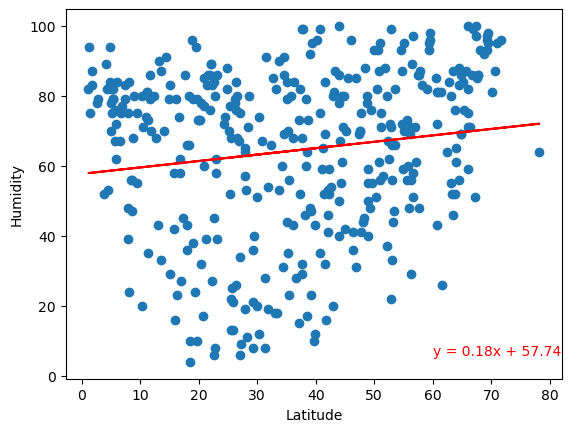

In [80]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
linear(x,y,(60,6),"Humidity")

The r-squared is: 0.04609900780797097


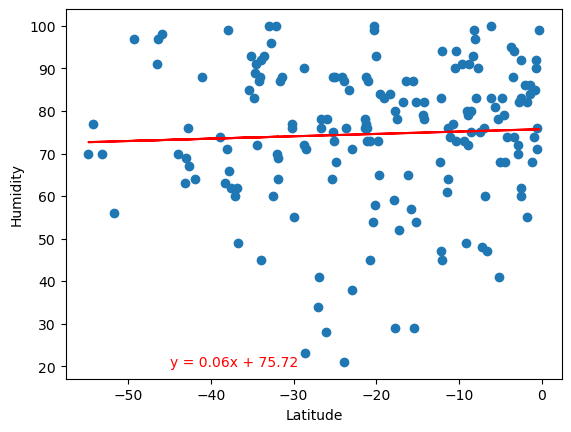

In [81]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
linear(x,y,(-45,20),"Humidity")

**Discussion about the linear relationship:** The R squared of .149 in the Northern hemisphere shows a weak positive relationship between latitude and Humidity. This tells me that you might be able to expect more humidity as you move North away from the equator, but you cannot be confident in this expectation and should not be suprised if humidity went down as you moved North away from the equator. The Southen hemishphere has an even weaker postive relationship, bordering on no real relationship. This shows again that as you move away from the equator to the shouth, humidity could decrease but with such a weak r Squared you cannot be confident in any expecations for how Humidity will change.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.050204246130419856


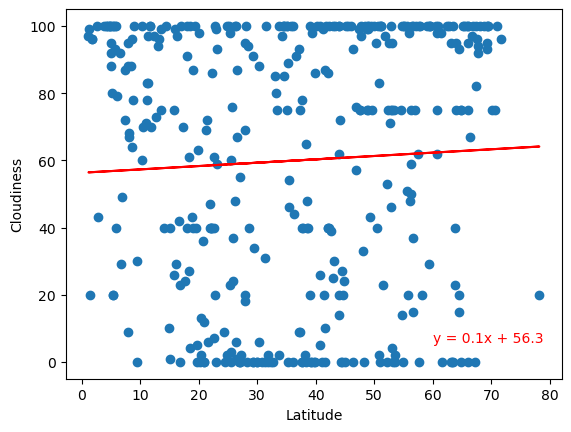

In [82]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
linear(x,y,(60,6),"Cloudiness")

The r-squared is: 0.23773960676120132


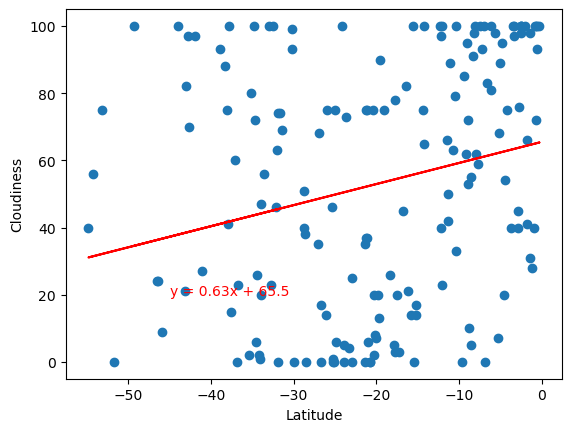

In [83]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
linear(x,y,(-45,20),"Cloudiness")

**Discussion about the linear relationship:** In the northern hemisphere there is no real relationship between Cloudiness and Latitude, you might be able to expect more cloudiness due to the postive r squared, but the plot shows at any latitude the cloudiness can vary from 0-100. In the Southern Hemisphere there is still a weak relationship between Cloudiness and Latitude, but I find it very interesting how much stronger the relationship is compared to the Northern Hemisphere, you can be more confident about the level of Cloudiness as you move from the equator compared to the Northern Hemisphere, but this relationship is still very weak and no real expectations should be had.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.08088611271338504


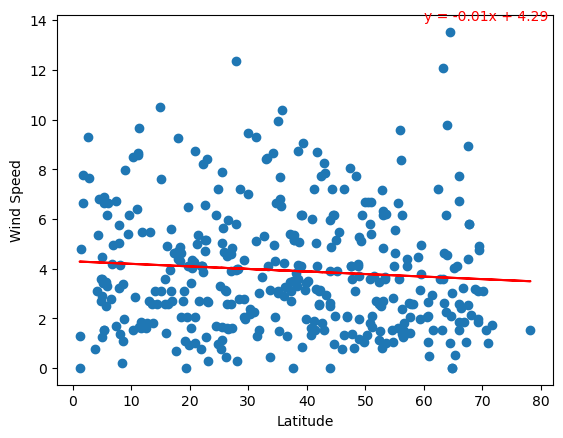

In [84]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
linear(x,y,(60,14),"Wind Speed")

The r-squared is: -0.22783225213383074


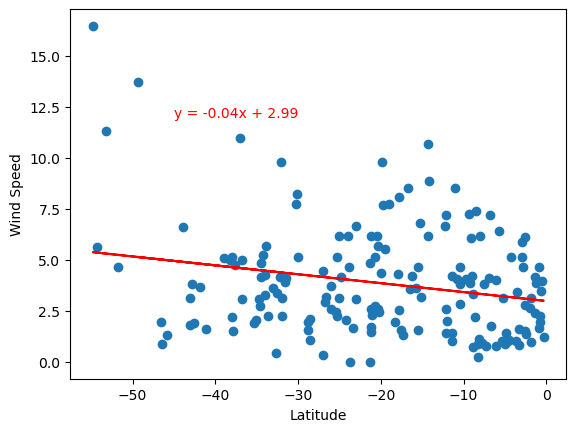

In [85]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
linear(x,y,(-45,12),"Wind Speed")

**Discussion about the linear relationship:** The northern hemisphere has a very weak negative relationship between Wind Speed and Latitude, suggesting that as you move further from the equator north wind speeds can be expected to go down, but due to how weak this relationship is you should not be confident in that assumption. The Southern hemisphere has a negative relatinoship between Wind Speed and Latitude, though it is stronger than the Northern Hemisphere. This shows that wind speeds go up as you move further from the equator more consistently than in the Northern Hemisphere, but it is still a weak relationship overall.